<a href="https://colab.research.google.com/github/ta6345538/SML_PRACtice/blob/main/sampling_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('all.csv')

In [10]:
df.columns

Index(['Unnamed: 0', 'State', 'District', 'Persons', 'Males', 'Females',
       'Growth..1991...2001.', 'Rural', 'Urban', 'Scheduled.Caste.population',
       'Percentage...SC.to.total', 'Number.of.households',
       'Household.size..per.household.', 'Sex.ratio..females.per.1000.males.',
       'Sex.ratio..0.6.years.', 'Scheduled.Tribe.population',
       'Percentage.to.total.population..ST.', 'Persons..literate',
       'Males..Literate', 'Females..Literate', 'Persons..literacy.rate',
       'Males..Literatacy.Rate', 'Females..Literacy.Rate', 'Total.Educated',
       'Data.without.level', 'Below.Primary', 'Primary', 'Middle',
       'Matric.Higher.Secondary.Diploma', 'Graduate.and.Above', 'X0...4.years',
       'X5...14.years', 'X15...59.years', 'X60.years.and.above..Incl..A.N.S..',
       'Total.workers', 'Main.workers', 'Marginal.workers', 'Non.workers',
       'SC.1.Name', 'SC.1.Population', 'SC.2.Name', 'SC.2.Population',
       'SC.3.Name', 'SC.3.Population', 'Religeon.1.Name',


In [11]:
df_samp = df[['State', 'District', 'Persons']].dropna()

In [12]:
# Number of samples to draw
n_samples = 100

Simple Random Sampling

In [14]:
srs_sample = df_samp.sample(n=n_samples, random_state=42).reset_index(drop=True)

Text(0.5, 0, 'Persons')

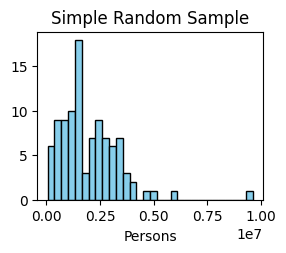

In [15]:
plt.subplot(2, 2, 2)
plt.hist(srs_sample['Persons'], bins=30, color='skyblue', edgecolor='black')
plt.title('Simple Random Sample')
plt.xlabel('Persons')

Systematic Sampling

In [16]:
step = len(df_samp) // n_samples
start = np.random.randint(0, step)
systematic_indices = list(range(start, start + step * n_samples, step))
systematic_sample = df_samp.iloc[systematic_indices].reset_index(drop=True)

Text(0.5, 0, 'Persons')

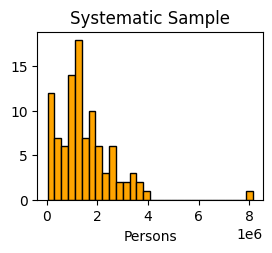

In [17]:
plt.subplot(2, 2, 3)
plt.hist(systematic_sample['Persons'], bins=30, color='orange', edgecolor='black')
plt.title('Systematic Sample')
plt.xlabel('Persons')

Stratified Sampling (by State)

In [18]:
# First check how many states are there
states = df_samp['State'].unique()
n_states = len(states)

# Allocate samples proportionally (some states may have few districts)
samples_per_state = max(n_samples // n_states, 1)

stratified_sample = (
    df_samp.groupby('State', group_keys=False)
    .apply(lambda x: x.sample(min(len(x), samples_per_state), random_state=1))
    .reset_index(drop=True)
)

<ipython-input-18-3ba47212119e>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), samples_per_state), random_state=1))


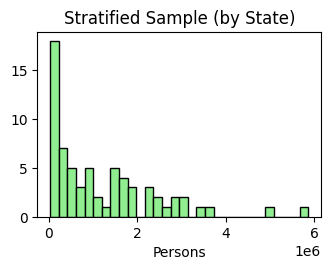

In [19]:
plt.subplot(2, 2, 4)
plt.hist(stratified_sample['Persons'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Stratified Sample (by State)')
plt.xlabel('Persons')

plt.tight_layout()
plt.show()

Probability Proportional to Size (PPS) Sampling

In [20]:

# Drop rows with missing values in required columns (to avoid errors)
df_pps = df[['State', 'District', 'Persons']].dropna()

# Size variable: 'Persons'
size_variable = df_pps['Persons'].values

# Calculate cumulative sum of size variable
cum_size = np.cumsum(size_variable)

# Total sum
total = cum_size[-1]

# How many samples to draw?
n_samples = 100

# Random selection points based on cumulative size
interval = total / n_samples
start = np.random.uniform(0, interval)
points = [start + i * interval for i in range(n_samples)]

# Find indices corresponding to sampling points
sampled_indices = np.searchsorted(cum_size, points)

# Select the samples from the DataFrame
sample_pps = df_pps.iloc[sampled_indices]
print(sample_pps.head(10))

     State                                          District  Persons
5   Andhra          District Medak (04), Andhra Pradesh (28)  2670097
8   Andhra    District Mahbubnagar (07), Andhra Pradesh (28)  3513934
11  Andhra        District Khammam (10), Andhra Pradesh (28)  2578927
14  Andhra  District Visakhapatnam (13), Andhra Pradesh (28)  3832336
17  Andhra         District Guntur (17), Andhra Pradesh (28)  4465144
20  Andhra       District Cuddapah (20), Andhra Pradesh (28)  2601797
23  Andhra       District Chittoor (23), Andhra Pradesh (28)  3745875
42   Assam                  District Kamrup (06), Assam (18)  2522324
50   Assam                District Tinsukia (14), Assam (18)  1150062
60   Bihar      District Pashchim Champaran (01), Bihar (10)  3043466


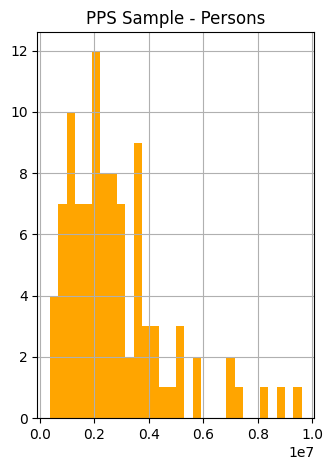

In [21]:
# Histogram of PPS Sample
plt.subplot(1, 2, 2)
sample_pps['Persons'].hist(bins=30, color='orange')
plt.title("PPS Sample - Persons")

plt.tight_layout()
plt.show()